The data set contains various information that effect the predictions like Age, Sex, BP, Cholesterol levels, Na to Potassium Ratio and finally the drug type.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('drug.csv')

In [26]:
df.shape

(200, 6)

In [27]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [28]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [29]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [30]:
df.duplicated().sum()

0

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [32]:
cat_col = ['Sex', 'BP', 'Cholesterol', 'Drug']
for col in cat_col:
  print(f"{col}: {df[col].unique()}")

Sex: ['F' 'M']
BP: ['HIGH' 'LOW' 'NORMAL']
Cholesterol: ['HIGH' 'NORMAL']
Drug: ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


<Axes: xlabel='Age', ylabel='Density'>

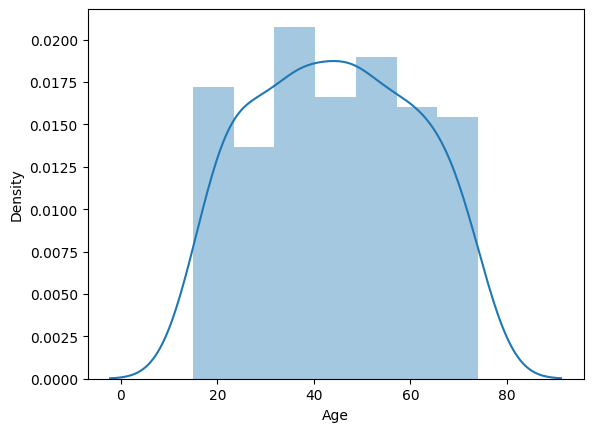

In [33]:
sns.distplot(df['Age'])

In [34]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [35]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [36]:
a = ['Sex', 'Drug']
for col in a:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

In [37]:
oe = OrdinalEncoder(categories=[['LOW', 'NORMAL', 'HIGH']])
df['BP'] = oe.fit_transform(df[['BP']])

In [38]:
oe = OrdinalEncoder(categories=[['NORMAL', 'HIGH']])
df['Cholesterol'] = oe.fit_transform(df[['Cholesterol']])

In [40]:
#female-0, male-1
#'DrugY'-0 'drugA'-1 'drugB'-2 'drugC'-3 'drugX'-4
#BP 'HIGH'-2 'LOW'-0 'NORMAL'-1
#Cholesterol 'HIGH'-1 'NORMAL'-0

In [41]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2.0,1.0,25.355,0
1,47,1,0.0,1.0,13.093,3
2,47,1,0.0,1.0,10.114,3
3,28,0,1.0,1.0,7.798,4
4,61,0,0.0,1.0,18.043,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    float64
 3   Cholesterol  200 non-null    float64
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 9.5 KB


In [43]:
X = df.drop('Drug', axis=1)
y = df['Drug']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [45]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [46]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred = classifier.predict(X_test)
y_pred

array([4, 0, 4, 4, 3, 2, 3, 2, 0, 4, 0, 0, 0, 0, 1, 3, 4, 4, 4, 4])

In [48]:
classifier.predict_proba(X_test)

array([[4.97836829e-02, 1.98793721e-04, 2.40045203e-03, 7.25636069e-02,
        8.75053464e-01],
       [8.20188373e-01, 1.28714800e-06, 5.96707602e-05, 1.00413300e-01,
        7.93373683e-02],
       [2.36753568e-01, 1.22323875e-04, 6.85169737e-04, 3.20552144e-02,
        7.30383724e-01],
       [9.92379328e-02, 2.67769603e-05, 1.79623662e-03, 4.56788330e-02,
        8.53260221e-01],
       [9.21166908e-04, 2.50698688e-05, 1.17273316e-02, 7.50824796e-01,
        2.36501636e-01],
       [2.43142137e-01, 2.40232382e-01, 3.70654782e-01, 1.28233086e-03,
        1.44688367e-01],
       [6.07355048e-02, 2.98422825e-05, 2.34185600e-03, 5.33396590e-01,
        4.03496207e-01],
       [9.19538567e-03, 4.61938609e-02, 7.91479539e-01, 5.46578448e-05,
        1.53076556e-01],
       [9.37362012e-01, 1.81887266e-02, 1.56593969e-02, 1.81183455e-04,
        2.86086810e-02],
       [1.67162934e-02, 3.85083811e-02, 1.41981128e-01, 5.68934137e-03,
        7.97104856e-01],
       [4.89833257e-01, 1.0901

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [51]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6 0 0 0 0]
 [0 1 0 0 0]
 [0 0 2 0 0]
 [0 0 0 3 0]
 [0 0 0 0 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [52]:
print(accuracy_score(y_test, y_pred))

1.0


In [54]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0, 0.5, 1]
}

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
grid = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

In [57]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.5, 1],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [58]:
grid.best_params_

{'C': 100, 'l1_ratio': 0, 'penalty': 'l2'}

In [59]:
grid.best_score_

0.9333333333333332

In [60]:
y_pred_gird = grid.predict(X_test)

In [61]:
print(accuracy_score(y_test, y_pred_gird))

0.95
